In [1]:
import pandas as pd

In [ ]:
##trying out visualization

In [58]:

final_annos=pd.read_csv(r"C:\Users\gen80\OneDrive\Documents\MDSlectures\COLX_523_advanced_corp_ling\COLX523_SH_VT_AL\data\Combined_annotations.csv")



In [59]:
final_annos.head()

,text,lang,company,rating
0,@AilesCyclables @RasLeScoot On parle de Retro ...,fr,Facebook,Irrelevant
1,@akasugarcane Ils étaient grave bien en plus !...,fr,Facebook,Irrelevant
2,@AmazonHelp Bon @amazonca @AmazonHelp visiblem...,fr,Amazon,Negative
3,Jvous aurait bien passée mon Amazon prime pour...,fr,Amazon,Irrelevant
4,"""Microsoft Announcements on Azure Artificial I...",fr,Microsoft,Neutral


In [71]:
len(final_annos)

3020

In [6]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [73]:
label_df.query("rating !=0 ").groupby(["company","rating"]).count()

text
company   rating      
Amazon    1         35
          2         48
          3        126
          4        146
          5         23
Apple     1         33
          2         95
          3        197
          4        102
          5         44
Facebook  1         11
          2         41
          3        203
          4         34
          5          7
Microsoft 1          5
          2         54
          3        207
          4         58
          5          8

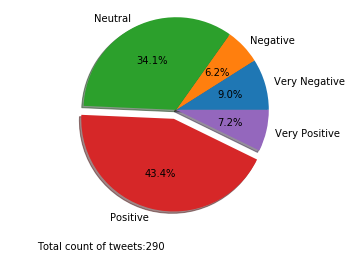

In [103]:
#working on 3-lang combined annotation corpus

final_annos=pd.read_csv(r"C:\Users\gen80\OneDrive\Documents\MDSlectures\COLX_523_advanced_corp_ling\COLX523_SH_VT_AL\data\Combined_annotations.csv")
annot_dict = {"Very Positive": 5, "Positive": 4, "Neutral": 3, "Negative": 2, "Very Negative": 1, "Irrelevant":0}
label_df['rating'] = final_annos['rating'].apply(lambda x: annot_dict[x])

## HERE pass in the filtering query
Apple_rating_counts=label_df.query("lang =='en' & company == 'Amazon' & rating !=0 ").groupby("rating").count()
#print(Apple_rating_counts)

import matplotlib.pyplot as plt
import numpy as np

labels = ['Very Negative',"Negative","Neutral","Positive","Very Positive"]
sizes = Apple_rating_counts.text

biggest_ind =np.argmax(sizes)
explode = [0,0,0,0,0]
explode[biggest_ind] =0.1
#print(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title("Percentage Breakdown of Consumer Sentiment Towards Apple on Weibo")
plt.text(-1.5,-1.5,"Total count of tweets:"+str(np.sum(sizes)))
plt.savefig("apple.png")
plt.show()



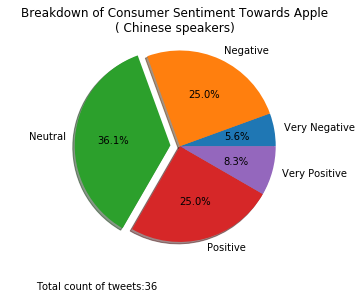

In [134]:
#working on combined-- make a function to call 

def make_pie_chart(anno_file, lang=None, company=None):
    
    """ make and saves a pie chart showing the percentage of different annotated sentiment rating,
    for each of the 4 tech companies and for each of the 3 languages. """

    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    final_annos=pd.read_csv(anno_file)
    annot_dict = {"Very Positive": 5, "Positive": 4, "Neutral": 3, "Negative": 2, "Very Negative": 1, "Irrelevant":0}
    rev_dict = {5:"Very Positive", 4:"Positive", 3:"Neutral", 2:"Negative", 1:"Very Negative", 0:"Irrelevant"}
    lang_dict = {"zh": "Chinese", "en":"English","fr":"French","All":"All language"}
    
    label_df['rating'] = final_annos['rating'].apply(lambda x: annot_dict[x])

    ## HERE pass in the filtering query
    if lang and company:
        q_string = "lang =='" + lang + "' & company == '" + company + "' & rating !=0 "
    elif lang:
        q_string = "lang =='" + lang + "' & rating !=0 "
    elif company:
         q_string = "company == '" + company + "' & rating !=0 "
    else:
        q_string = " rating !=0 "


    Apple_rating_counts=label_df.query(q_string).groupby("rating").count()


    labels = [rev_dict[i] for i in Apple_rating_counts.index]
    sizes = Apple_rating_counts.text

    biggest_ind =np.argmax(sizes)
    explode = np.zeros(len(labels))
    explode[biggest_ind] =0.1

    if not lang:
        lang = "All"
    if not company:
        company ="All"
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Breakdown of Consumer Sentiment Towards "+company +"\n" + "( " +lang_dict[lang]+" speakers)")
    plt.text(-1.5,-1.5,"Total count of tweets:"+str(np.sum(sizes)))
    
    ##saving to file with filename

    
    plt.savefig(lang+"_"+company+".png")

    plt.show()

zh Apple


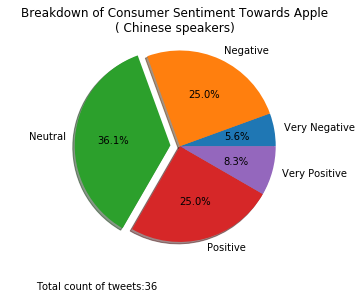

zh Amazon


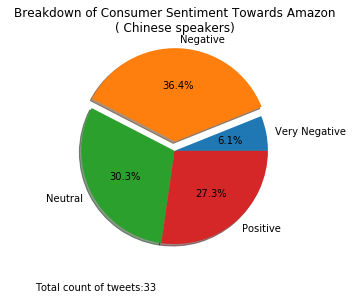

zh Microsoft


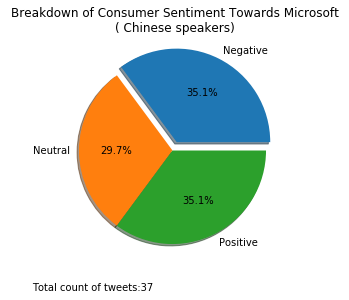

zh Facebook


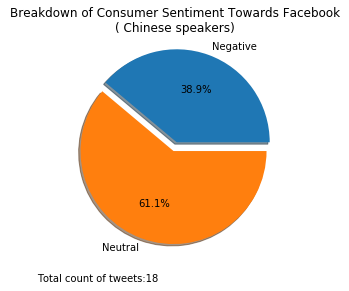

zh None


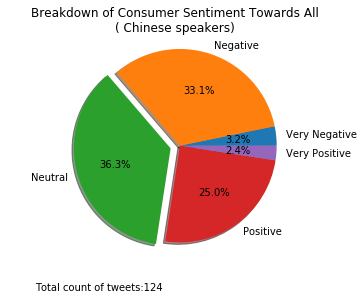

en Apple


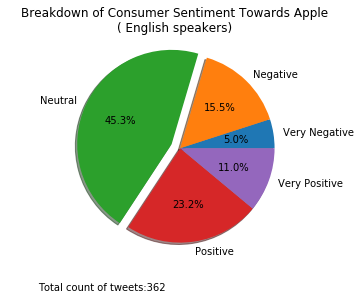

en Amazon


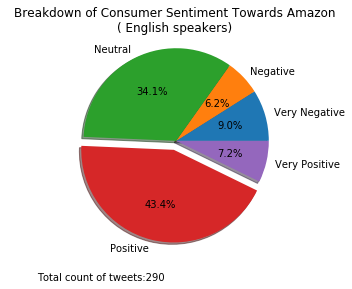

en Microsoft


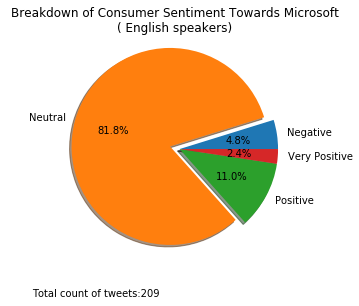

en Facebook


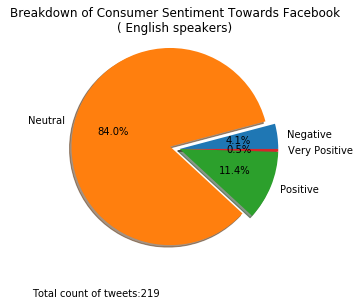

en None


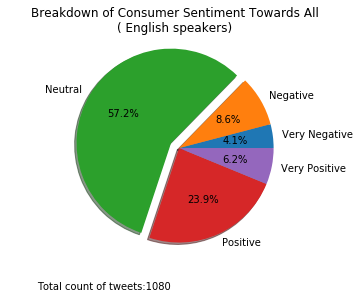

fr Apple


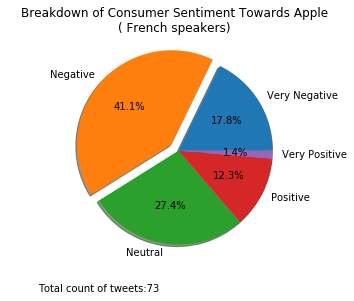

fr Amazon


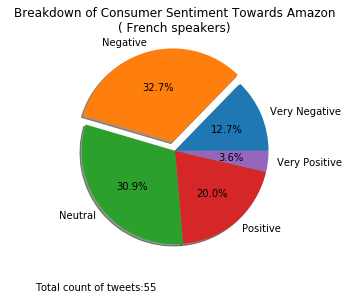

fr Microsoft


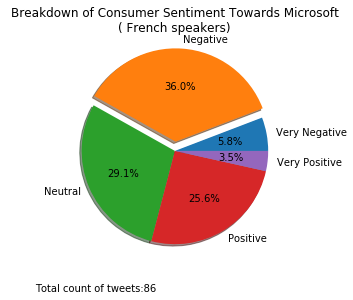

fr Facebook


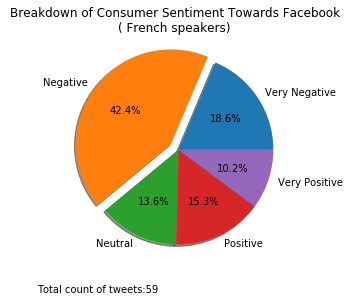

fr None


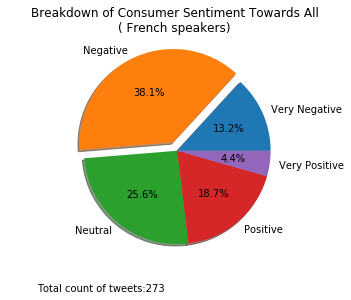

None Apple


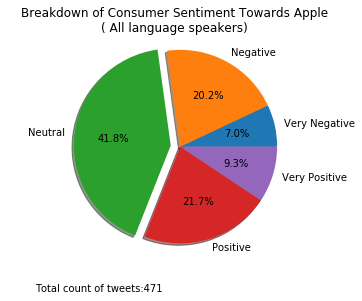

None Amazon


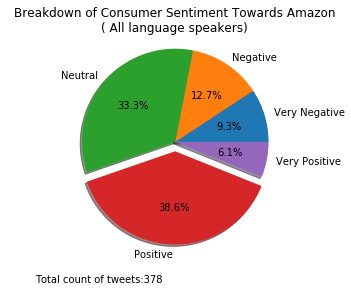

None Microsoft


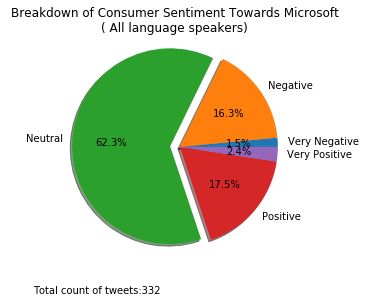

None Facebook


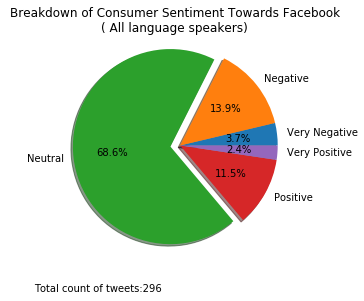

None None


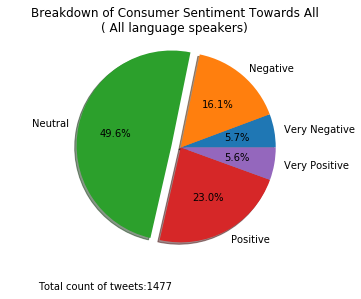

In [135]:
anno_file = r"C:\Users\gen80\OneDrive\Documents\MDSlectures\COLX_523_advanced_corp_ling\COLX523_SH_VT_AL\data\Combined_annotations.csv"

langs = ['zh','en','fr',None]
companies = ['Apple','Amazon','Microsoft','Facebook',None]

for lang in langs:
    for company in companies:
        print(lang, company)
        make_pie_chart(anno_file, lang, company)



In [123]:
label_df.query("rating !=0 ")

,text,lang,company,rating
2,@AmazonHelp Bon @amazonca @AmazonHelp visiblem...,fr,Amazon,2
4,"""Microsoft Announcements on Azure Artificial I...",fr,Microsoft,3
6,#Facebook\n\nPlus de 7 Américains sur 10 estim...,fr,Facebook,1
7,Le gouvernement français prévient #Facebook : ...,fr,Facebook,2
9,C’est une carte mère d’un IPhone 8+ Mdrrrr Sam...,fr,Apple,1
...,...,...,...,...
3009,遇到了网购里很尴尬的一件事 买的椅子有问题 装呢椅子背安不上 拆呢椅子底座拆不开 我只能退货...,zh,Amazon,2
3011,在Amazon上晃悠了两个小时，花了一千多块钱买了些喜欢的日用品 ，我喜欢这种海外购模式，这...,zh,Amazon,4
3014,正泰超话 人生第一次……一张专辑拆出两张小卡，还没有本命魔咒 谢谢amazon谢谢放小卡时手...,zh,Amazon,4
3018,昨晚我在亚马逊买水的时候我问少年买几箱（每箱是2Lx9瓶），他说“水这个东西用的很快的，喝和...,zh,Amazon,3


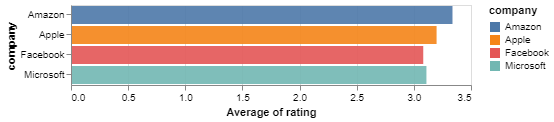

In [2]:
#average sentiment comparison bar chart across 3 languages 

#working on Chinese
#final_annos=pd.read_csv(r"C:\Users\gen80\OneDrive\Documents\MDSlectures\COLX_523_advanced_corp_ling\COLX523_SH_VT_AL\data\ChineseWeiboCorpus\Weibo_final_annotations.csv")
#working on French
#final_annos=pd.read_csv(r"C:\Users\gen80\OneDrive\Documents\MDSlectures\COLX_523_advanced_corp_ling\COLX523_SH_VT_AL\data\final_anotations_french.csv")
#working on English
final_annos=pd.read_csv(r"C:\Users\gen80\OneDrive\Documents\MDSlectures\COLX_523_advanced_corp_ling\COLX523_SH_VT_AL\data\final_annotations_english.csv")
#print(final_annos.head())

#for Chinese
#label_df=final_annos[['Text','Company','FinalLabel']]
#label_df= label_df.rename(columns={'Text':'text','Company':'company','FinalLabel':'rating'})
#for french
#label_df=final_annos[['text','company','rating']]
#for English
label_df=final_annos[['text','Company','Annotation']]
label_df= label_df.rename(columns={'Text':'text','Company':'company','Annotation':'rating'})
#print(label_df.head())

annot_dict = {"Very Positive": 5, "Positive": 4, "Neutral": 3, "Negative": 2, "Very Negative": 1, "Irrelevant":0}
label_df['rating'] = label_df['rating'].apply(lambda x: annot_dict[x])

label_df.head()

import altair as alt
alt.renderers.enable('notebook')

chart = alt.Chart(label_df.query("rating !=0 ")).mark_bar().encode(
x = 'average(rating)',
tooltip = ["company","average(rating)"],
y = "company:N",
color = "company:N"
).configure_mark(
    opacity=0.9
).interactive()

chart

In [5]:
chart.save("chart_Frenchtweets.png")

In [9]:
chart.save("chart_ChineseWeibo.png")

In [12]:
chart.save("chart_Englishtweets.png")

In [57]:
#reference: https://altair-viz.github.io/user_guide/saving_charts.html
chart.save('chart_Frenchtweets.html')